In [1]:
import sys
sys.path.append('../')  # Add the parent directory to the system path


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.preprocess import DataProcessor

In [3]:
df = pd.read_xml("../data/KUH.XML")
df.head(2)

,StringValue,NumberOfParameters,Service,TechnicalEventType,TechnicalID,Description,TimeStamp,ProcessName,MemoField
0,Memo-field,NaN,None,None,NaN,None,None,None,None
1,None,226502.0,None,None,NaN,None,None,None,None


In [4]:
processor = DataProcessor()
df_large , df_small =  processor.prep_data(df)

Extracting Data from Message Column.......


In [6]:
df_large.head()


,NewCFactor,N_Pulses,RunLength,RunLength_Cum,N_Pulses_Cum
70473,1.00669634342194,16.0,11.557000160217299,11.557000160217299,16.0
70441,1.00669431686401,11.0,6.370999813079830,17.927999973297130,27.0
69886,1.00668978691101,12.0,7.635499954223630,25.563499927520759,39.0
69872,1.00668978691101,0.0,42.412998199462898,67.976498126983657,39.0
69804,1.00668644905090,13.0,8.401300430297850,76.377798557281508,52.0


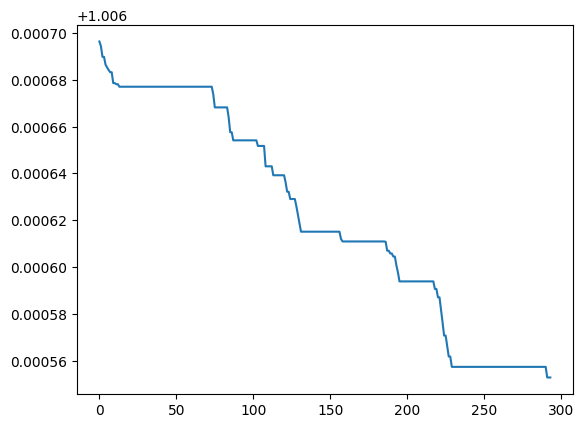

In [5]:
plt.plot(df_large.NewCFactor.values)

In [7]:
df = pd.read_xml("../data/KUH.XML")
df.head()

,StringValue,NumberOfParameters,Service,TechnicalEventType,TechnicalID,Description,TimeStamp,ProcessName,MemoField
0,Memo-field,NaN,None,None,NaN,None,None,None,None
1,None,226502.0,None,None,NaN,None,None,None,None
2,None,NaN,Field Service,Technical Event,620000001.0,Services.FSF.Server.SessionManager.FSF_SERVER_...,2023-5-18 10:4:30.0,C:\Program Files\PMS\MIP\Philips.PmsMip.Privat...,[FREE_TEXT] \n[FREE_TEXT] ... 3. SessionDetai...
3,None,NaN,Field Service,Technical Event,620000001.0,Services.FSF.Server.SessionManager.FSF_SERVER_...,2023-5-18 10:4:21.0,C:\Program Files\PMS\MIP\Philips.PmsMip.Privat...,[FREE_TEXT] \n[FREE_TEXT] ...onID : 3. Sessio...
4,None,NaN,Field Service,Technical Event,620000001.0,Services.FSF.Server.GenericUIDP.INFO: Successf...,2023-5-18 10:4:20.0,C:\Program Files\PMS\MIP\Philips.PmsMip.Privat...,[FREE_TEXT] \n[FREE_TEXT] Services.FSF.Server...


In [102]:
import scipy
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values
# np.polyfit(x ,y , len(x))
# scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(1e-4, 1e-6))


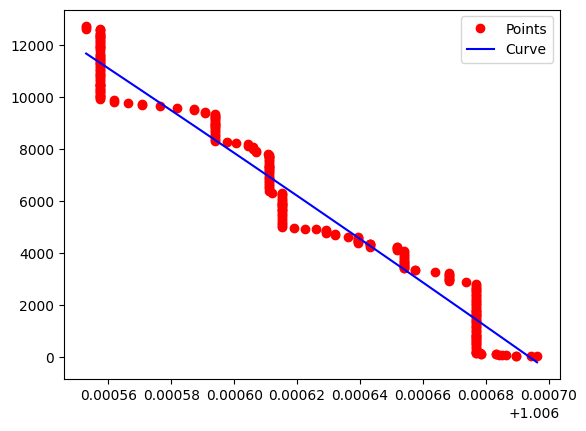

In [61]:
coefficients = np.polyfit(x  , y ,2)

p = np.poly1d(coefficients)
x_curve = np.linspace(x.min(), x.max(), 200)
y_curve = p(x_curve)

plt.plot(x, y, 'ro', label='Points')
plt.plot(x_curve, y_curve, 'b-', label='Curve')

# plt.plot(x , y)

plt.legend()

In [79]:
from sklearn.preprocessing import StandardScaler

std =StandardScaler()

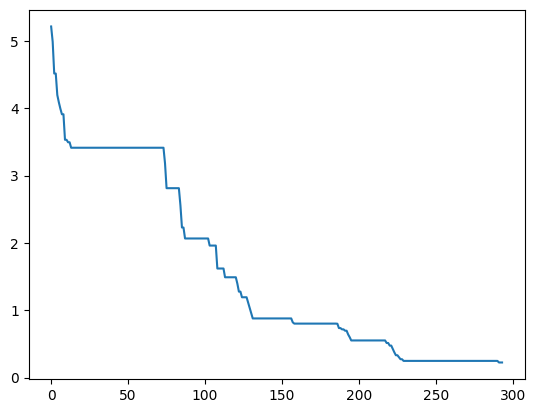

In [83]:
coefs = np.polyfit(x  , y ,2)
ln_y = coefs[0] + coefs[1] * x

ln_y_scaled = std.fit_transform(ln_y.reshape(-1,1))
plt.plot(np.exp(ln_y_scaled))

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_regression(x, y):
    coeffs = np.polyfit(x, np.log(y), 1)
    slope = coeffs[0]
    intercept = np.exp(coeffs[1])
    
    return slope, intercept

# Example data
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([2.71828, 7.38906, 20.0855, 54.5981, 148.413])

# Perform exponential regression
slope, intercept = exponential_regression(x.reshape(-1,1), std.fit_transform(y.reshape(-1,1)))

# Generate predicted values using the regression line
x_pred = np.linspace(x.min(), x.max(), 100)
y_pred = intercept * np.exp(slope * x_pred)

# Plot the predictions and true values
# plt.scatter(x, y, color='red', label='True values')
plt.plot(x_pred, y_pred, color='blue', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Regression')
plt.legend()
plt.show()


/tmp/ipykernel_12154/1537642497.py:5: RuntimeWarning: invalid value encountered in log
  coeffs = np.polyfit(x, np.log(y), 1)


TypeError: expected 1D vector for x

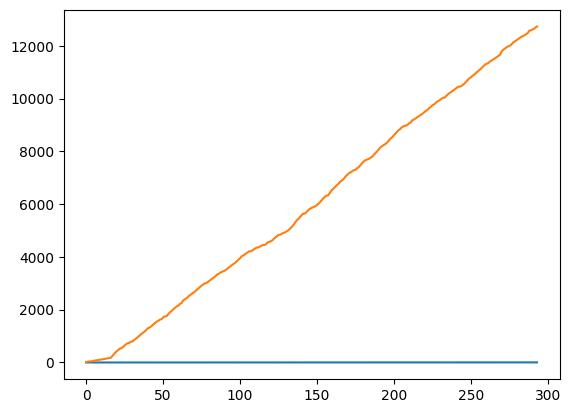

In [96]:
plt.plot(std.fit_transform(y.reshape(-1,1)))
plt.plot(y.reshape(-1,1))

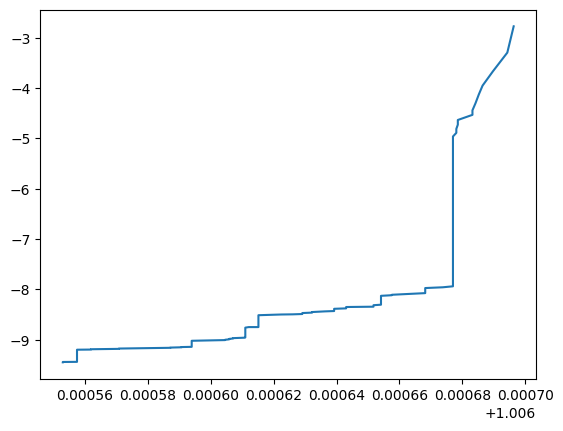

In [114]:
plt.plot(x,-np.log(y))
# plt.plot(x, y)

In [109]:
np.exp(np.polyfit(x,np.log(y),1)[1])

/tmp/ipykernel_12154/3689136775.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(np.polyfit(x,np.log(y),1)[1])


inf